#Clusterização com modelo de agrupamento hierárquico: mall customer

## Importação das bibliotecas

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
import numpy as np

#seed
seed = 0
np.random.seed(seed)

## Carregar base de dados

In [7]:
df = pd.read_csv('Mall_Customers.csv', index_col=0)
df.head()

,Genre,Age,AnnualIncome,SpendingScore
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


Vamos trabalhar com duas dimensões para fazer análises gráficas

In [8]:
df = df.loc[:,'AnnualIncome':'SpendingScore']
df.head()

,AnnualIncome,SpendingScore
CustomerID,,
1,15,39
2,15,81
3,16,6
4,16,77
5,17,40


##Visualizar base

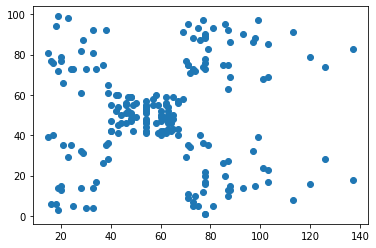

In [9]:
plt.scatter(x=df['AnnualIncome'], y=df['SpendingScore'])
plt.show()

##Rodar o agrupamento aglomerativo e analisar o dendograma

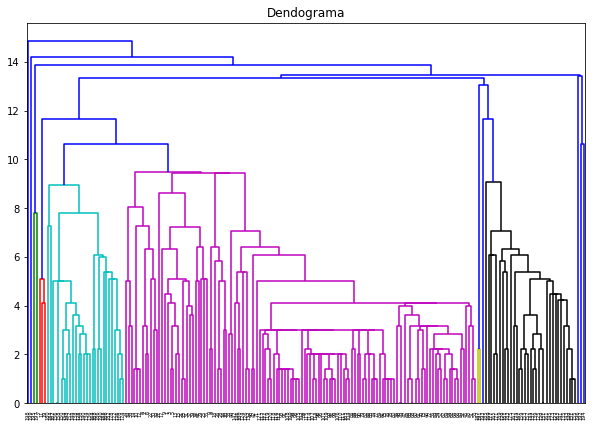

In [13]:
plt.figure(figsize=(10, 7))
plt.title("Dendograma")
dend = shc.dendrogram(shc.linkage(df))

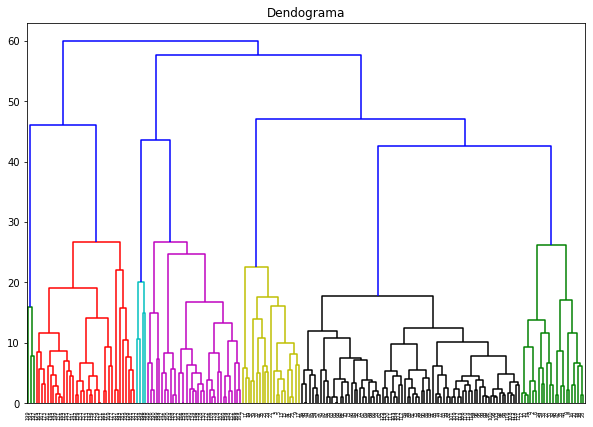

In [14]:
plt.figure(figsize=(10, 7))
plt.title("Dendograma")
dend = shc.dendrogram(shc.linkage(df, method='average'))

In [15]:
model = AgglomerativeClustering(n_clusters=7)
model = model.fit(df)

In [16]:
# Grupos de cada registro da base
model.labels_

array([1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 4, 0, 4, 5, 4, 5, 4,
       0, 4, 5, 4, 5, 4, 5, 4, 5, 4, 0, 4, 5, 4, 0, 4, 5, 4, 5, 4, 5, 4,
       5, 4, 5, 4, 5, 4, 0, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4,
       5, 4, 5, 2, 6, 2, 5, 2, 6, 2, 6, 4, 6, 2, 6, 4, 6, 2, 6, 2, 6, 2,
       6, 2])

In [17]:
unique, counts = np.unique(model.labels_, return_counts=True)
print(dict(zip(unique, counts)))

{0: 85, 1: 23, 2: 9, 3: 21, 4: 30, 5: 23, 6: 9}


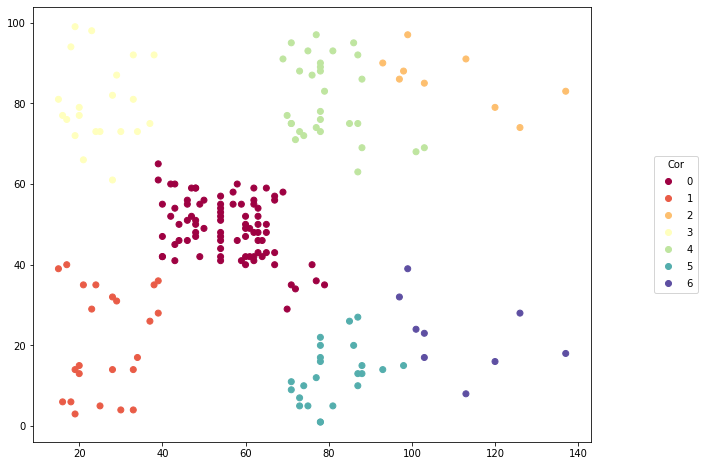

In [18]:
# Gráfico da separação dos grupos formados
plt.figure(figsize=(10,8))
fig = plt.scatter(x=df['AnnualIncome'], y=df['SpendingScore'], c=model.labels_, cmap='Spectral')
handles, labels = fig.legend_elements(prop="colors")
plt.legend(handles, labels, loc='center right', bbox_to_anchor=(1.2, 0.5), title='Cor')
plt.show()